
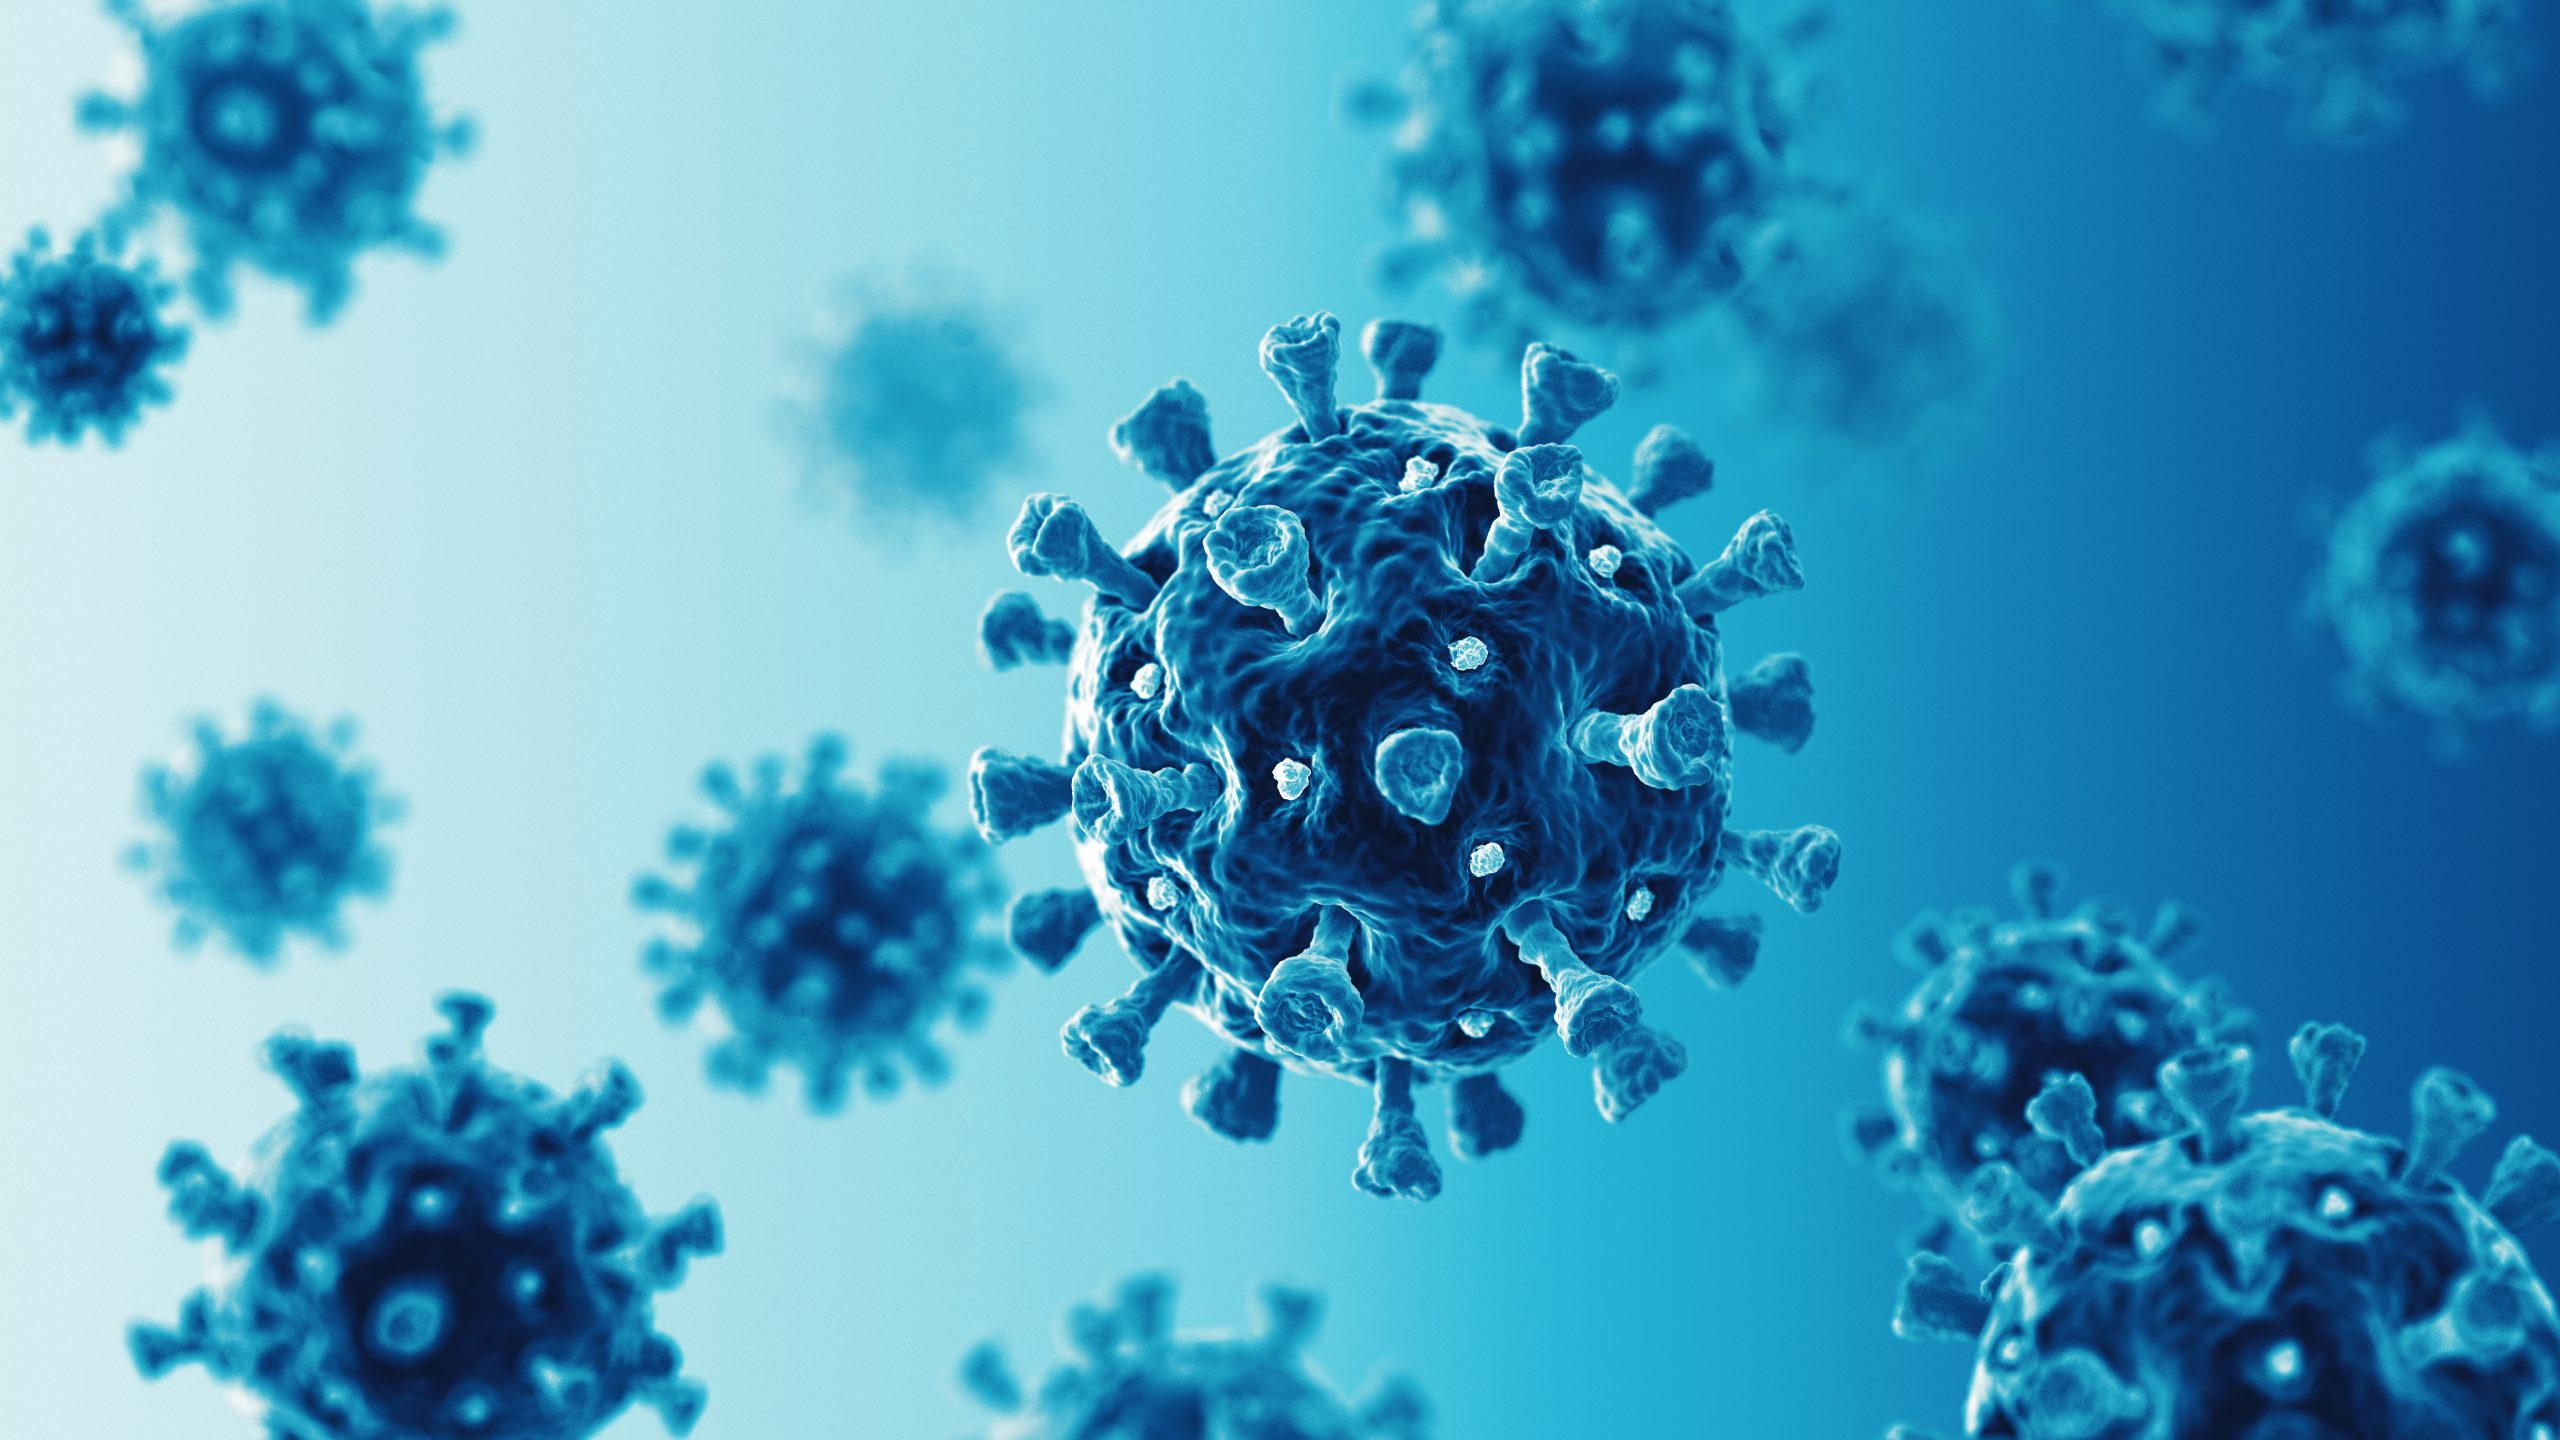

# COVID-19 Drug Discovery through Regression Techniques

### About the Dataset
This dataset consists of 2 different files for a potential drug against the COVID-19 virus. The original file consists of only a SMILES notation and pIC50 constant against the COVID-19 virus for a chemical compound. The second one consists of engineered features using the pubchempy library of Python. This library helps to access the PubChem data. PubChem is a database of millions of chemical compounds. We used this library to fetch the properties of the compounds using their SMILES representation.

The dataset is made publicly available by the Government of India as a part of their Drug Discovery Hackathon. There are some potential drugs against the COVID-19 virus in this dataset as suggested by the hackathon organisers.

## Goal of This Project

The goal of this project is to create a regression model that can accurately predict the pIC50 value for a given compound given its chemical properties as an input to determine its potential effectiveness in treating COVID-19 in patients. 

### Data Dictionary

We will give a brief description of each feature in the dataset used to predict drugs effiectiveness in treating COVID-19

1. **`CID`** - (int64) the PubChem Compound unique Indentifier
2. **`SMILES`** - (object) simplified molecular-input line-entry system - chemical notation that allows the respresentation of a compound in a way that can be used by a computer
3. **`MolecularFormula`** - (object) The chemical molecular formula
4. **`MolecularWeight`** - (float64) The weight of molecules in the chemical
5. **`InChl`** -  (object)(internation Chemical Identifier) is a textual identifier for chemical substances, designed to provide a standard way to encode molecular information and to facilitate the search for such information in databases and on the web
6. **`InChlKey`** - (object) Hashed version of the full standard InChI, consisting of 27 characters
7. **`IUPACName`** - (object) Chemical name systematically determined according to the IUPAC nomenclature for orgaic compounds
8. **`XLogP`** -  (float64) Computationally generated octanol-water partition coefficient or distribution coefficient. XLogP is used as a measure of hydrophilicity or hydrophobicity of a molecule.
9. **`ExactMass`** -  (float64) The mass of the most likely isotopic composition for a single molecule, corresponding to the most intense ion/molecule peak in a mass spectrum.
10. **`MonoisotopicMass`** - (float64) The mass of a molecule, calculated using the mass of the most abundant isotope of each element
11. **`TPSA`** - (float64) Topological Polar Surface Area is the surface area sum over all polar atoms or molecules, primarily oxygen and nitrogen, also including their attached hydrogen atoms
12. **`Complexity`** - (float64) The molecular complexity rating of a compound
13. **`Charge`** - (float64) The total (or net) charge of a molecule
14. **`HBondDonorCount`** - (float64) Number of hydrogen-bond donors in the structure
15. **`HBondAcceptorCount`** - (float64) Number of hydrogen-bond acceptors in the structure
16. **`RotatableBondCount`** - (float64) Number of rotatable bonds
17. **`HeavyAtomCount`** - (float64) Number of non-hydrogen atoms
18. **`IsotopeAtomCount`** - (float64) Number of atoms with enriched isotope(s)
19. **`AtomStereoCount`** - (float64) Total number of atoms with tetrahedral (sp3) stereo
20. **`DefinedAtomStereoCount`** - (float64) Number of atoms with defined tetrahedral (sp3) stereo
21. **`UndefinedAtomStereoCount`** - (float64) Number of atoms with undefined tetrahedral (sp3) stereo
22. **`BondStereoCount`** - (float64) otal number of bonds with planar (sp2) stereo
23. **`DefinedBondStereoCount`** -  (float64) Number of atoms with defined planar (sp2) stereo
24. **`UndefinedBondStereoCount`** - (float64) Number of atoms with undefined planar (sp2) stereo
25. **`CovalentUnitCount`** - (float64) Number of covalently bound units
26. **`Volume3D`** - (float64) Analytic volume of the first diverse conformer (default conformer) for a compound
27. **`XStericQuadrupole3D`** - (float64) The x component of the quadrupole moment (Qx) of the first diverse conformer (default conformer) for a compound
28. **`YStericQuadrupole3D`** - (float64) The y component of the quadrupole moment (Qy) of the first diverse conformer (default conformer) for a compound
29. **`ZStericQuadruploe3D`** - (float64) The z component of the quadrupole moment (Qz) of the first diverse conformer (default conformer) for a compound
30. **`FeatureCount3D`** - (float64) Total number of 3D features (the sum of FeatureAcceptorCount3D, FeatureDonorCount3D, FeatureAnionCount3D, FeatureCationCount3D, FeatureRingCount3D and FeatureHydrophobeCount3D)
31. **`FeatureAcceptorCount3D`** - (float64) Number of hydrogen-bond acceptors of a conformer.
32. **`FeatureDonorCount3D`** - (float64) Number of hydrogen-bond donors of a conformer
33. **`FeatureAnionCount3D`** - (float64) Number of anionic centers (at pH 7) of a conformer
34. **`FeatureCationCount3D`** - (float64) Number of cationic centers (at pH 7) of a conformer.
35. **`FeatureRingCount3D`** - (float64) Number of rings of a conformer
36. **`FeatureHydrophobeCount3D`** - (float64) Number of hydrophobes of a conformer
37. **`ConformerModelRMSD3D`** - (float64) Conformer sampling RMSD
38. **`EffectiveRotorCount3D`** - (float64) Total number of 3D features (the sum of FeatureAcceptorCount3D, FeatureDonorCount3D, FeatureAnionCount3D, FeatureCationCount3D, FeatureRingCount3D and FeatureHydrophobeCount3D)
39. **`ConformerCount3D`** - (float64) The number of conformers in the conformer model for a compound.
40. **`pIC50`** - (object) pIC50 is the negative log of the IC50 value when converted to molar and is a measurement of potency of a drug. Values greater than 6.0 are considered effective and values over 9.0 are consider very effective drugs

# Import Libraries and Necessary Installation

In [786]:
pip install seaborn==0.11.0

Note: you may need to restart the kernel to use updated packages.


In [106]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import random
from nose.tools import *
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,recall_score,accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.inspection import permutation_importance
import time
import xgboost as xgb
plt.style.use(style="seaborn")
%matplotlib inline

# Read File

In [3]:
df = pd.read_csv("DDH Data with Properties.csv")

In [4]:
df.head()

,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,2820914,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,NNVVKOVHRSDRSQ-UHFFFAOYSA-N,N-(2-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
4,2744846,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036


In [5]:
#Checked memory usage using the info method in Pandas.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CID                       104 non-null    int64  
 1   SMILES                    104 non-null    object 
 2   MolecularFormula          104 non-null    object 
 3   MolecularWeight           104 non-null    float64
 4   InChI                     104 non-null    object 
 5   InChIKey                  101 non-null    object 
 6   IUPACName                 101 non-null    object 
 7   XLogP                     101 non-null    float64
 8   ExactMass                 101 non-null    float64
 9   MonoisotopicMass          101 non-null    float64
 10  TPSA                      101 non-null    float64
 11  Complexity                101 non-null    float64
 12  Charge                    101 non-null    float64
 13  HBondDonorCount           101 non-null    float64
 14  HBondAccep

# Exploratory Data Analysis

## Showing the Shape of the Dataset

In [7]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (104, 40)


## Showing the Feature Size

In [8]:
Feature_Size = len(df.columns)
print("Feature_Size for Data =", Feature_Size)

Feature_Size for Data = 40


## Descriptive Statistics for Dataset

In [9]:
df.describe()

,CID,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,...,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D
count,1.040000e+02,104.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.539089e+07,367.867981,3.207921,378.261335,378.221780,101.017822,576.336634,0.0,0.693069,5.732673,...,8.450000,3.750000,0.660000,0.230000,0.320000,3.220000,0.270000,0.798000,4.966000,8.890000
std,4.443420e+07,100.488055,1.609763,78.756938,78.695752,34.974503,156.648286,0.0,0.796776,1.859522,...,1.748737,1.200799,0.781348,0.489382,0.529532,0.847814,0.489382,0.221099,2.364733,2.692657
min,0.000000e+00,0.000000,-0.600000,212.007805,212.007805,34.100000,242.000000,0.0,0.000000,2.000000,...,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600000,0.000000,1.000000
25%,2.799801e+06,309.092500,2.200000,310.120509,310.120509,83.100000,474.000000,0.0,0.000000,5.000000,...,7.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.600000,3.150000,10.000000
50%,1.393569e+07,370.850000,3.400000,372.089226,372.089226,96.900000,554.000000,0.0,0.000000,6.000000,...,9.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.800000,5.000000,10.000000
75%,7.305647e+07,431.425000,4.300000,434.104876,433.845920,120.000000,670.000000,0.0,1.000000,6.000000,...,9.250000,4.000000,1.000000,0.000000,1.000000,4.000000,0.250000,1.000000,7.000000,10.000000
max,1.354276e+08,588.600000,7.300000,588.177766,588.177766,197.000000,960.000000,0.0,3.000000,12.000000,...,13.000000,7.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.400000,12.000000,10.000000


## All data types

In [10]:
display(df.dtypes.value_counts())

float64    33
object      6
int64       1
dtype: int64

## Showing the Numerical and Categorical Variables

In [11]:
#Check if there are any categorical variables in the dataset so that we can process them accordingly during Feature Engineering.

numerical_var = df.columns[df.dtypes != 'object']
categorical_var = df.columns[df.dtypes == object]

print(numerical_var)
print(categorical_var)

Index(['CID', 'MolecularWeight', 'XLogP', 'ExactMass', 'MonoisotopicMass',
       'TPSA', 'Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount',
       'RotatableBondCount', 'HeavyAtomCount', 'IsotopeAtomCount',
       'AtomStereoCount', 'DefinedAtomStereoCount', 'UndefinedAtomStereoCount',
       'BondStereoCount', 'DefinedBondStereoCount', 'UndefinedBondStereoCount',
       'CovalentUnitCount', 'Volume3D', 'XStericQuadrupole3D',
       'YStericQuadrupole3D', 'ZStericQuadrupole3D', 'FeatureCount3D',
       'FeatureAcceptorCount3D', 'FeatureDonorCount3D', 'FeatureAnionCount3D',
       'FeatureCationCount3D', 'FeatureRingCount3D',
       'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
       'EffectiveRotorCount3D', 'ConformerCount3D'],
      dtype='object')
Index(['SMILES', 'MolecularFormula', 'InChI', 'InChIKey', 'IUPACName',
       'pIC50'],
      dtype='object')


## Check for Duplicate rows

In [12]:
#No Duplicates found

df.duplicated().sum()

0

## Check Null values

In [13]:
#Null values found

df.isnull().values.any()

True

In [14]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CID                       104 non-null    int64  
 1   SMILES                    104 non-null    object 
 2   MolecularFormula          104 non-null    object 
 3   MolecularWeight           104 non-null    float64
 4   InChI                     104 non-null    object 
 5   InChIKey                  101 non-null    object 
 6   IUPACName                 101 non-null    object 
 7   XLogP                     101 non-null    float64
 8   ExactMass                 101 non-null    float64
 9   MonoisotopicMass          101 non-null    float64
 10  TPSA                      101 non-null    float64
 11  Complexity                101 non-null    float64
 12  Charge                    101 non-null    float64
 13  HBondDonorCount           101 non-null    float64
 14  HBondAccep

C:\Users\tremm\AppData\Local\Temp/ipykernel_3216/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


## Correlation Analysis

C:\Users\tremm\anaconda3\lib\site-packages\seaborn\matrix.py:308: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:title={'center':'Correlation'}>

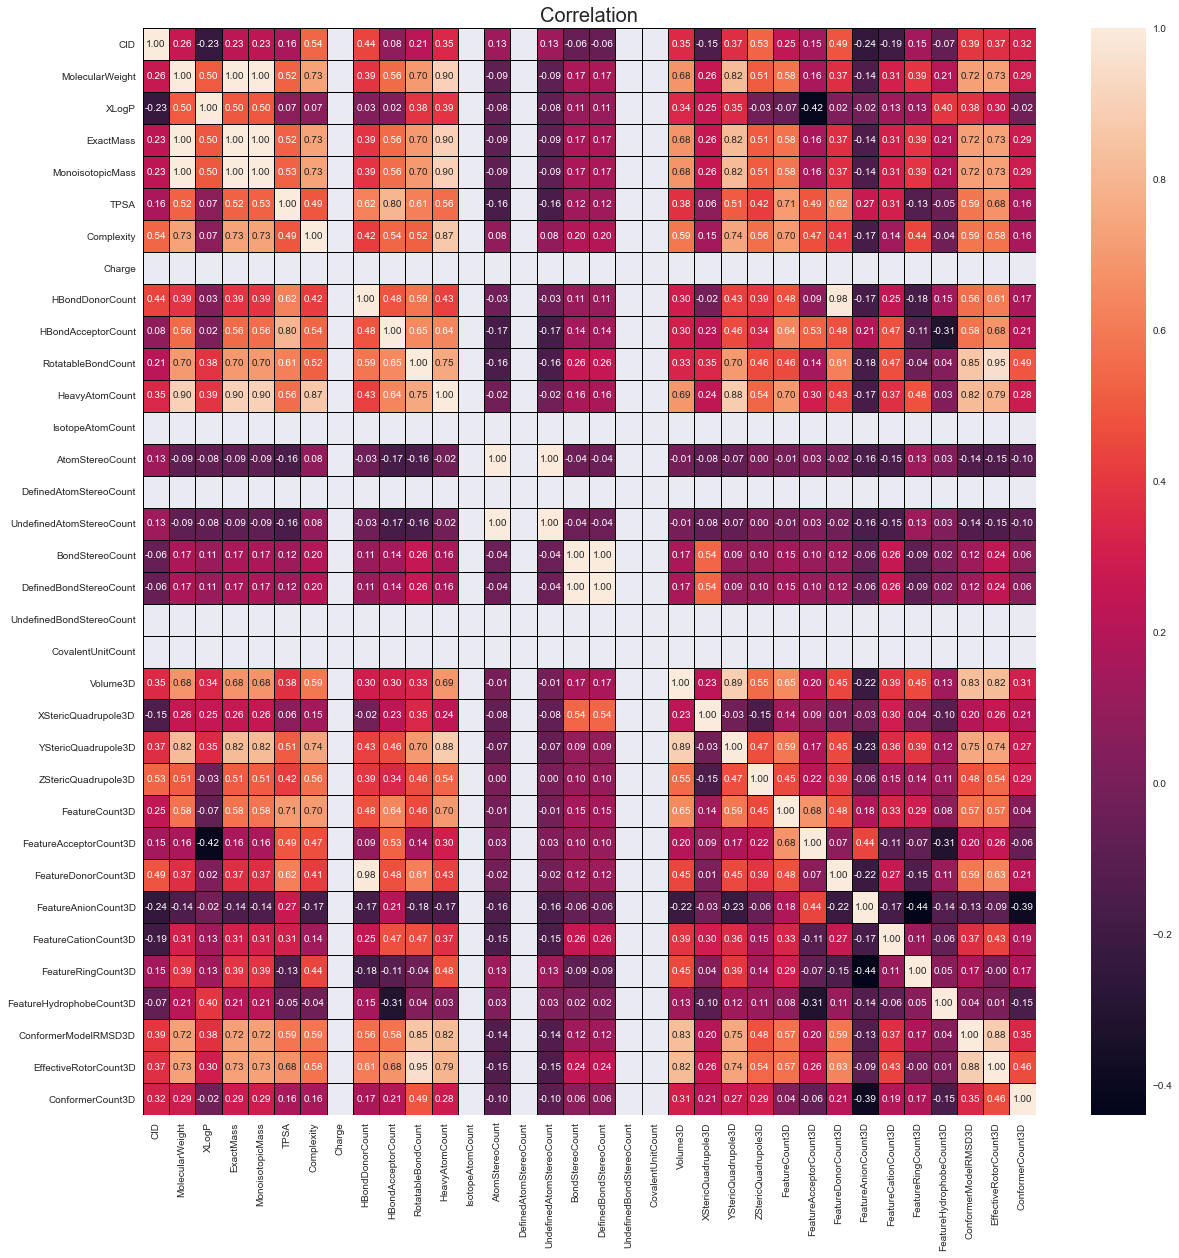

In [15]:
plt.figure(figsize=(20,20))
plt.title("Correlation", fontsize=20)
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, Linewidth=0.7, annot=True, linecolor='black', fmt='.2f', annot_kws={"size": 10})

We can see from the correlation heatmap that there are many highly correlated features and some columns with constant values throughout the dataset. Let's create a function to return the highest correlated pairs > 0.7 in descending order

In [16]:
# Find High correlations between features
# corrmap = sb.heatmap(data.corr(), annot=True)
# mp.show()
corr_matrix = df.corr()
#corr_matrix.where(corr_matrix > 0.5, axis=0)

# Get highly correlated pairs and print out by descending order
corr_pairs = []
for index, row in corr_matrix.iterrows():
    #print(index, row.index, row.values)
    for i in range(len(row.values)):
        if (row.values[i] > 0.7 and row.index[i] != index):
            pair = (index, row.index[i], row.values[i])
            corr_pairs.append(pair)


# sort correlations in descending order
corr_pairs = sorted(corr_pairs, key=lambda x: x[2], reverse=True)
# Remove duplicate entries
corr_pairs[1::2]

    

[('UndefinedAtomStereoCount', 'AtomStereoCount', 1.0),
 ('DefinedBondStereoCount', 'BondStereoCount', 1.0),
 ('MonoisotopicMass', 'ExactMass', 0.9999939917575803),
 ('ExactMass', 'MolecularWeight', 0.9999922586719143),
 ('MonoisotopicMass', 'MolecularWeight', 0.9999862526506706),
 ('FeatureDonorCount3D', 'HBondDonorCount', 0.9840181306170912),
 ('EffectiveRotorCount3D', 'RotatableBondCount', 0.9529417505140707),
 ('HeavyAtomCount', 'MonoisotopicMass', 0.9013129942582692),
 ('HeavyAtomCount', 'ExactMass', 0.9006915788750173),
 ('HeavyAtomCount', 'MolecularWeight', 0.900174158367271),
 ('YStericQuadrupole3D', 'Volume3D', 0.8919031675588577),
 ('EffectiveRotorCount3D', 'ConformerModelRMSD3D', 0.8831553884414762),
 ('YStericQuadrupole3D', 'HeavyAtomCount', 0.8791061347207125),
 ('HeavyAtomCount', 'Complexity', 0.868117981612684),
 ('ConformerModelRMSD3D', 'RotatableBondCount', 0.8543047248343358),
 ('ConformerModelRMSD3D', 'Volume3D', 0.8267927269496544),
 ('YStericQuadrupole3D', 'Monoisot

# Feature Engineering

## Drop All rows with NaN values 

In [17]:
df.dropna(axis=0,inplace = True)
df

,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,2820914,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,NNVVKOVHRSDRSQ-UHFFFAOYSA-N,N-(2-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
4,2744846,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,11796320,IC1=CC=C2N(CC3=CC4=CC=CC=C4S3)C(=O)C(=O)C2=C1,C17H10INO2S,419.2,InChI=1S/C17H10INO2S/c18-11-5-6-14-13(8-11)16(...,MAYSJMBSILUGEG-UHFFFAOYSA-N,"1-(1-benzothiophen-2-ylmethyl)-5-iodoindole-2,...",4.1,418.947700,418.947700,...,2.0,0.0,0.0,0.0,4.0,1.0,0.6,2.2,10.0,0.022276395
100,44398344,ClC1=C2C(=O)C(=O)N(CC3=CC4=CC=CC=C4S3)C2=CC=C1,C17H10ClNO2S,327.8,InChI=1S/C17H10ClNO2S/c18-12-5-3-6-13-15(12)16...,VCHRPHJPXICPGC-UHFFFAOYSA-N,1-(1-benzothiophen-2-ylmethyl)-4-chloroindole-...,4.1,327.012077,327.012077,...,2.0,0.0,0.0,0.0,4.0,0.0,0.6,2.2,10.0,-1.049218023
101,44398231,IC1=CC=C2N(C\C=C\C3=CC4=CC=CC=C4S3)C(=O)C(=O)C...,C19H12INO2S,445.3,InChI=1S/C19H12INO2S/c20-13-7-8-16-15(11-13)18...,ULTYNOLOPCCXGD-HWKANZROSA-N,1-[(E)-3-(1-benzothiophen-2-yl)prop-2-enyl]-5-...,4.7,444.963350,444.963350,...,2.0,0.0,0.0,0.0,4.0,1.0,0.6,3.2,10.0,-1.371067862
102,44398546,ClC1=CC=C(NC(=O)C2=CC=C(CN3C(=O)C(=O)C4=CC(I)=...,C20H12ClIN2O3S,522.7,InChI=1S/C20H12ClIN2O3S/c21-11-1-4-13(5-2-11)2...,QLHBUHQTCJSYDO-UHFFFAOYSA-N,"N-(4-chlorophenyl)-5-[(5-iodo-2,3-dioxoindol-1...",4.6,521.930190,521.930190,...,3.0,1.0,0.0,0.0,4.0,1.0,0.8,5.2,10.0,-1.099335278


## Check for Null values after dropping

In [18]:
df.isnull().values.any()

False

## Drop the rows where pIC50 = 'BLINDED'

In [19]:
df1 = df[df.pIC50 != 'BLINDED']

In [20]:
df1.head()

,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
4,2744846,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036
5,2745617,ClC1=CC=C(NC(=O)CSC2=NC=CC(=N2)C2=CC(=NO2)C2=C...,C21H15ClN4O2S,422.9,InChI=1S/C21H15ClN4O2S/c22-15-6-8-16(9-7-15)24...,TUBDEXWKZSAMKH-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-(3-phenyl-1,2-oxazol-5...",4.4,422.060425,422.060425,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.176091259


## Convert pIC50 to float

In [23]:
df1['pIC50']=df1['pIC50'].apply(pd.to_numeric, downcast='float', errors='coerce') 

C:\Users\tremm\AppData\Local\Temp/ipykernel_3216/3372888984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pIC50']=df1['pIC50'].apply(pd.to_numeric, downcast='float', errors='coerce') # Should we be setting to float64 instead of float32 to be consistent with other numerical columns?


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 103
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CID                       91 non-null     int64  
 1   SMILES                    91 non-null     object 
 2   MolecularFormula          91 non-null     object 
 3   MolecularWeight           91 non-null     float64
 4   InChI                     91 non-null     object 
 5   InChIKey                  91 non-null     object 
 6   IUPACName                 91 non-null     object 
 7   XLogP                     91 non-null     float64
 8   ExactMass                 91 non-null     float64
 9   MonoisotopicMass          91 non-null     float64
 10  TPSA                      91 non-null     float64
 11  Complexity                91 non-null     float64
 12  Charge                    91 non-null     float64
 13  HBondDonorCount           91 non-null     float64
 14  HBondAccept

## Showing the Distribution of the target variable pIC50

C:\Users\tremm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pIC50', ylabel='Density'>

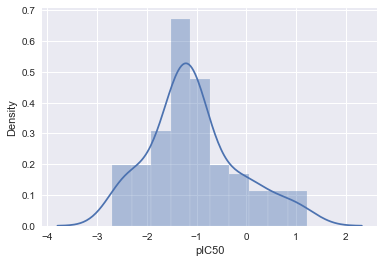

In [25]:
sns.set_style("darkgrid")
sns.distplot(df1['pIC50'], kde=True)

## Label Encoding to convert categorical variables into numerical variables

In [26]:
for col in df1.columns:
    if df1[col].dtype == "object":
        le = LabelEncoder()
        le.fit(list(df1[col].astype(str).values))
        df1[col] = le.transform(list(df1[col].astype(str).values)) 

C:\Users\tremm\AppData\Local\Temp/ipykernel_3216/2945733029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = le.transform(list(df1[col].astype(str).values))


In [27]:
df1.head()

,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,53,64,473.4,72,44,67,5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121
1,2821293,38,65,510.0,73,5,79,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1.000000
2,2820912,47,70,519.1,78,82,78,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041393
4,2744846,17,47,460.0,53,39,76,4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128
5,2745617,61,66,422.9,74,70,75,4.4,422.060425,422.060425,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.176091


# Feature Selection

We will drop All features with constant values and string formulas as their converted encoded label is not relevant to the target variable. We also drop extremely high correlated variables to decrease multicolinarity in our regression models 

In [28]:
# Drop charge column since all values are 0
df1.drop('Charge', axis = 1, inplace=True)

# Only need one weight measurement 
df1.drop(['ExactMass', 'MonoisotopicMass'], axis = 1, inplace=True)

# Drop other formula notations as they are not relevant for regression task
df1.drop(['MolecularFormula', 'InChI', 'InChIKey', 'IUPACName', 'CID'], axis=1, inplace=True)

#Drop IsotopeAtomCount, DefinedAtomStereoCount, UndefinedBondStereoCount, CovalentUnitCount as they are
#not correlated with other attributes and constant values throughout the data.

df1.drop(['IsotopeAtomCount', 'DefinedAtomStereoCount', 'UndefinedAtomStereoCount','UndefinedBondStereoCount', 'CovalentUnitCount'], axis=1, inplace=True) 

# Drop high correlations
df1.drop(['DefinedBondStereoCount', 'HBondDonorCount', 'RotatableBondCount', 'HeavyAtomCount', 'Volume3D'], axis=1, inplace=True)


C:\Users\tremm\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Next we will recreate the correlation heatmap to check if there is still any very high correlations amoung the features

C:\Users\tremm\anaconda3\lib\site-packages\seaborn\matrix.py:308: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:title={'center':'Correlation'}>

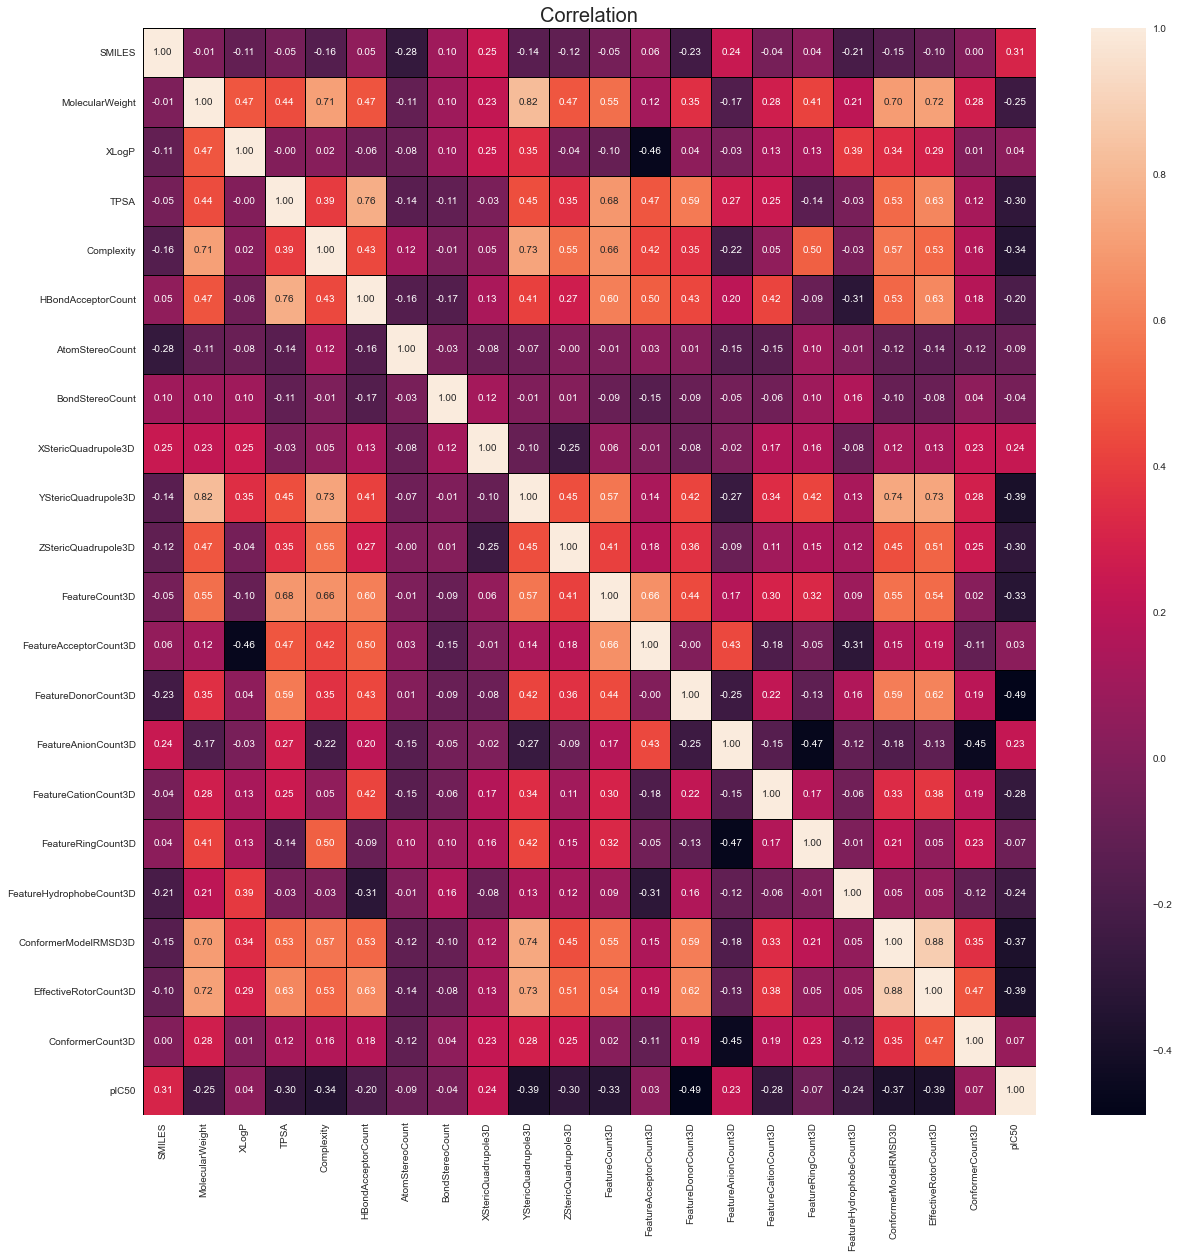

In [29]:
plt.figure(figsize=(20,20))
plt.title("Correlation", fontsize=20)
corr = df1.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, Linewidth=0.7, annot=True, linecolor='black', fmt='.2f', annot_kws={"size": 10})

The highest correlations have been successfully dropped from the dataset

# Scaling the data

In [31]:
scaler_x = preprocessing.MinMaxScaler()
df2=  pd.DataFrame(scaler_x.fit_transform(df1), columns = df1.columns)

# Splitting dataset into train and test dataset

To maintain consistency from the milestone 2 report on the existing Kaggle notebook we will split with 10% of the data for testing due to our constriant of only having a small amount of data available (~100 rows). 

In [33]:
y = df2.loc[:,'pIC50']
X = df2.iloc[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print(f'Training dataset shape: {X_train.shape}')
print(f'Testing dataset shape: {X_test.shape}')

Training dataset shape: (81, 21)
Testing dataset shape: (10, 21)


# Model Selection

## Check the MSE scores with parameter greater_is_better=False for some ML models 

In [34]:
def mse(y, y_pred):
    """
    Mean squared error function.
    y - true values
    y_pred - predicted values

    Output: MSE
    """
    assert(y.shape == y_pred.shape)
    return np.sqrt(mean_squared_error( y, y_pred))

mse_scorer = make_scorer(mse, greater_is_better=False)

We preformed initial cross validation on training dataset for popular regression models to get an estimate of the MSE for each

In [35]:
def test_algorithms():
    
    """
    A custom function designed for cross validation score on "Covid 19 Drug discovery dataset".
    The function is comparing the following algorithms :
    "LinearRegression", "Lasso", "Ridge", "Random Forrest", "XGBoost", "SVR" , "AdaBoost","BaggingRegressor",
    on "Covid 19 Drug discovery dataset" with mean squared error, standard deviation on MSE and execution time. 
    The output of this function is a pandas dataframe.
    """
    names = ["LinearRegression", "Lasso", "Ridge", "Random Forrest", "XGBoost", "SVR" , "AdaBoost", "BaggingRegressor"]
    
    regressors = [
        LinearRegression(),
        Lasso(random_state=42, alpha=1000),
        Ridge(random_state=42, alpha=3.5),
        RandomForestRegressor(random_state=42),
        XGBRegressor(objective ='reg:squarederror',random_state=42),
        SVR(),
        AdaBoostRegressor(random_state=42),
        BaggingRegressor(random_state=42)   
        ]
    
    
    data_X = [X_train, X_train, X_train, X_train, X_train, X_train, X_train, X_train]
    
    reg_columns=['algorithm','score_mse_mean','score_std','time']
    reg_performance = pd.DataFrame(columns=reg_columns)
    print('Please wait 1-2 minutes for all algorithms to complete.')
    for name, regressor, X_trains in zip(names, regressors,data_X):
        time_start = time.time()
        cv_results = cross_val_score(regressor, X_trains,Y_train, scoring = mse_scorer)
        #print(cv_results)
        time_end = round(time.time() - time_start,3)
        mean_score = round(-cv_results.mean(),4)
        std_score = round(cv_results.std(),4)
        t= pd.DataFrame([[name,mean_score,std_score,time_end]],columns = reg_columns)
        reg_performance = reg_performance.append(t, ignore_index=True)
        #print(name , ' MSE = ',mean_score , 'with std=',std_score ," execution_time =  ", time_end,"s")
    return reg_performance
reg_performance = test_algorithms()
reg_performance

Please wait 1-2 minutes for all algorithms to complete.


,algorithm,score_mse_mean,score_std,time
0,LinearRegression,0.2141,0.0356,0.058
1,Lasso,0.2391,0.0464,0.035
2,Ridge,0.1941,0.0363,0.040
3,Random Forrest,0.2010,0.0338,0.682
4,XGBoost,0.2041,0.0245,0.617
5,SVR,0.1852,0.0331,0.048
6,AdaBoost,0.1983,0.0122,0.324
7,BaggingRegressor,0.1989,0.0321,0.090


# Testing Our Models

We will know run a test on the test data for each to evaluate their fit for the data

## Linear Regression

In [37]:
regr = LinearRegression()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
lin_r2 = r2_score(Y_test, y_pred)
print(f'MSE: {mean_squared_error(Y_test, y_pred)}')
print(f'R2: {r2_score(Y_test, y_pred)}')

MSE: 0.02682836636346586
R2: 0.2693447966534094


In [50]:

def plot_regression_results(pred, r2):
    # Actual vs predicted plot
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.scatter(pred, Y_test, edgecolors=(0, 0, 1))
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('$R^2= %.2f$' % r2, fontsize=18)

    # Create residual plot
    plt.subplot(1,2,2)
    plt.scatter(pred,  pred - Y_test,
                c='limegreen', marker='s', edgecolor='white',
                label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
    plt.xlim([Y_test.min(), Y_test.max()])
    plt.title('$R^2= %.2f$' % r2, fontsize=18)
    plt.tight_layout()

    # plt.savefig('images/10_09.png', dpi=300)
    plt.show()

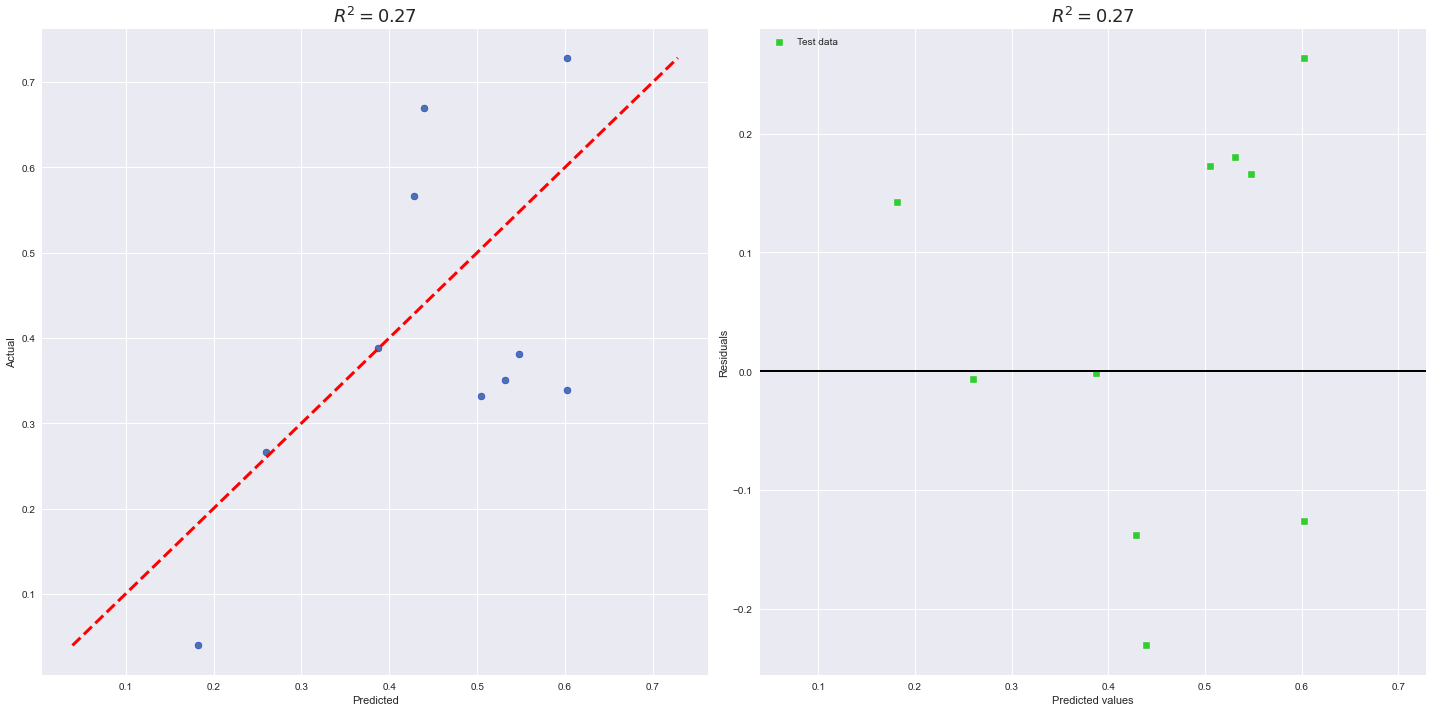

In [51]:
plot_regression_results(y_pred, lin_r2)

## Ridge Regression

We can use cross validation to find the optimial regularization penalty 

In [47]:
# find optimal penalty term through cross validation 
ridge_cv = RidgeCV(alphas=[0.1,1.0,3.5,4.0,4.5,5.0,10.0])
ridge_model_cv = ridge_cv.fit(X_train,Y_train)
print(f'Best performing alpha value: {ridge_model_cv.alpha_}')

Best performing alpha value: 3.5


In [48]:
ridge = Ridge(random_state=42, alpha=3.5)
ridge_model = ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = metrics.r2_score(Y_test, ridge_pred)
print(f'MSE: {metrics.mean_squared_error(Y_test, ridge_pred)}')
print(f'R2: {metrics.r2_score(Y_test, ridge_pred)}')

MSE: 0.03126384713357021
R2: 0.14854701641906287


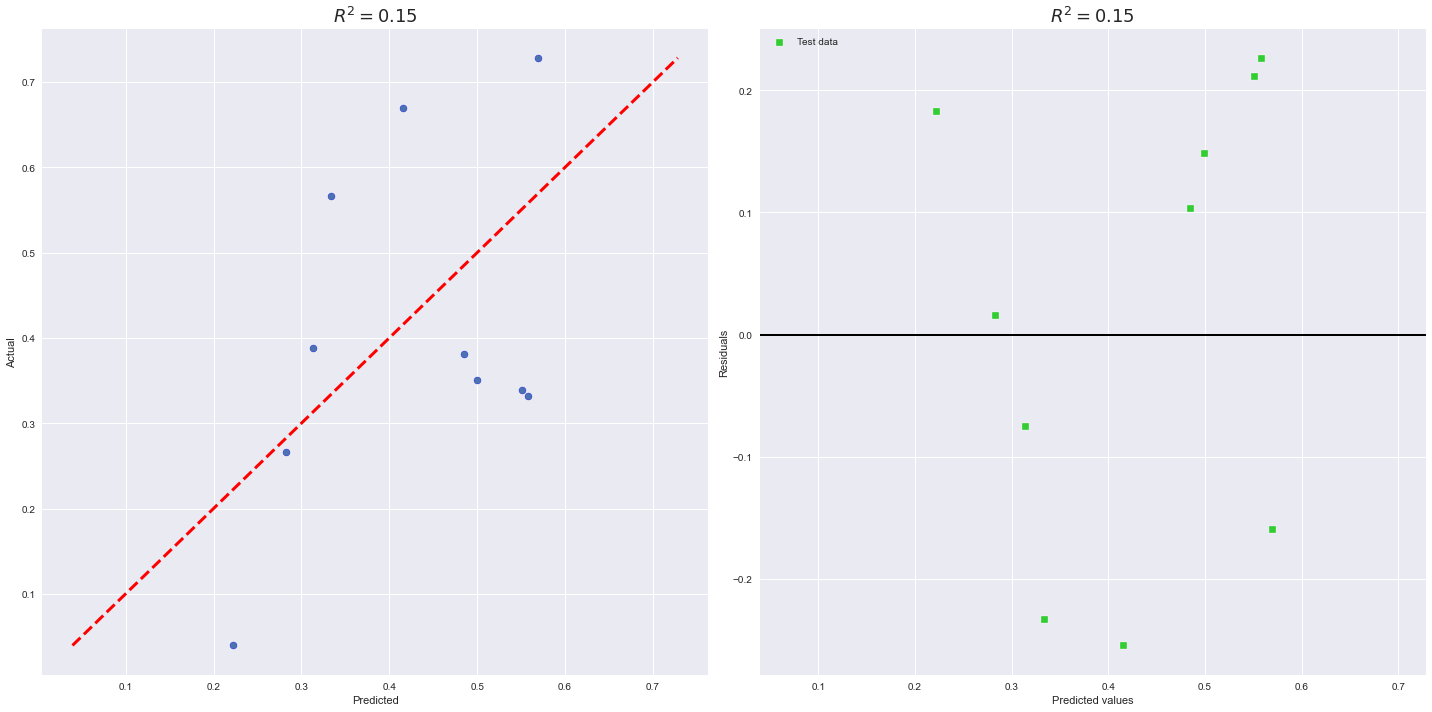

In [52]:
plot_regression_results(ridge_pred, ridge_r2)

## Lasso Regression
Similar to what was done for ridge regression, we can find the optimal value for the penalty term in Lasso using cross validation

In [53]:
# Find optimal alpha for lasso
lasso_cv = LassoCV(alphas=[0.1,1.0,3.5,4.0,4.5,5.0,10.0, 20.0, 50.0, 100.0, 500.0])
lasso_model_cv = lasso_cv.fit(X_train,Y_train)
print(f'Best performing value for alpha: {lasso_model_cv.alpha_}')

Best performing value for alpha: 500.0


In [60]:
lasso = Lasso(random_state=42, alpha=500)
lasso_model = lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = metrics.r2_score(Y_test, lasso_pred)
print(f'MSE: {metrics.mean_squared_error(Y_test, lasso_pred)}')
print(f'R2: {metrics.r2_score(Y_test, lasso_pred)}')

MSE: 0.03694705671843243
R2: -0.0062319439780009755


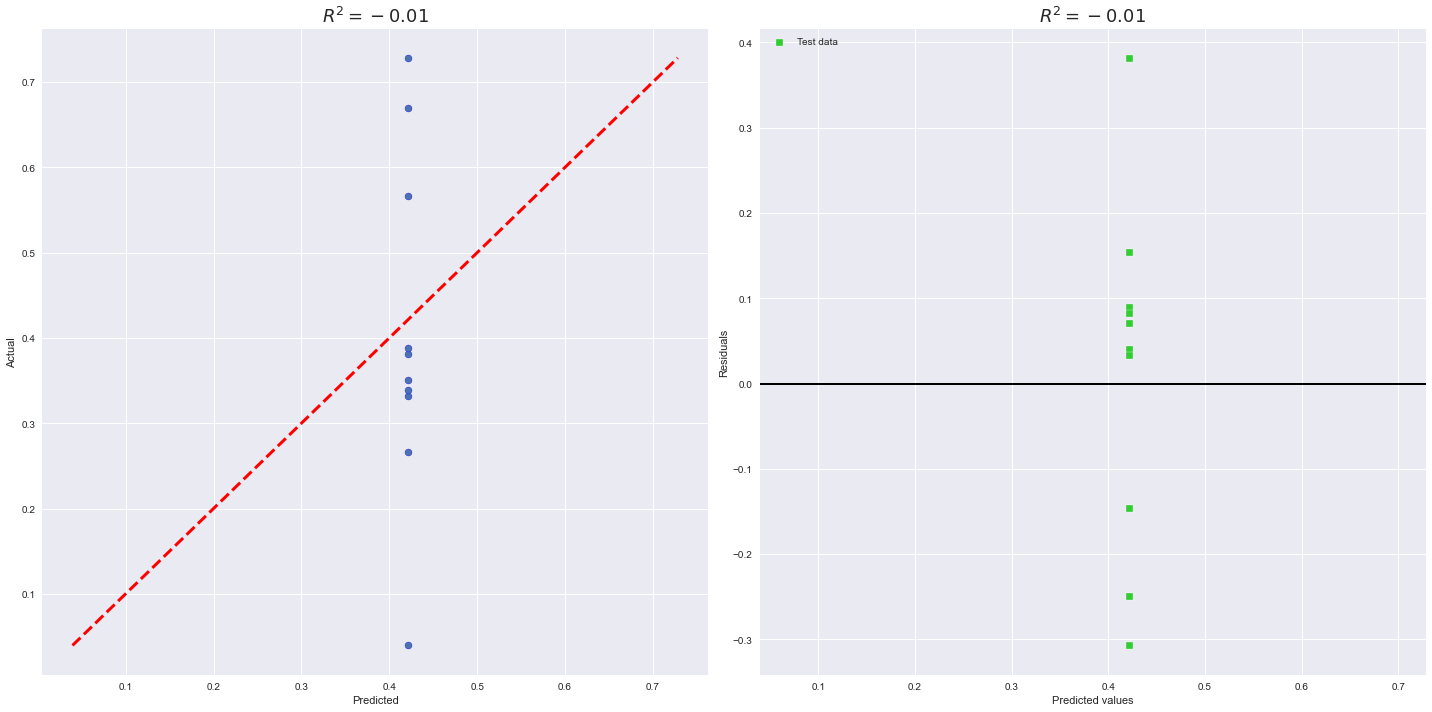

In [61]:
plot_regression_results(lasso_pred, lasso_r2)

## Polynomial Regression

We can see if increasing flexibility of the regression model improves test accuracy 

In [72]:
# Polynomial Regression
# create polynomial features and train the model
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X_train)
x_poly_test = poly_reg.fit_transform(X_test)
poly_model = LinearRegression()
poly_model.fit(x_poly, Y_train)


LinearRegression()

In [73]:
# polynomial regression model results
poly_pred = poly_model.predict(x_poly_test)
poly_r2 = metrics.r2_score(Y_test, poly_pred)
print(f'MSE: {metrics.mean_squared_error(Y_test, poly_pred)}')
print(f'R2: {metrics.r2_score(Y_test, poly_pred)}')

MSE: 0.0497874339193578
R2: -0.35593226816788714


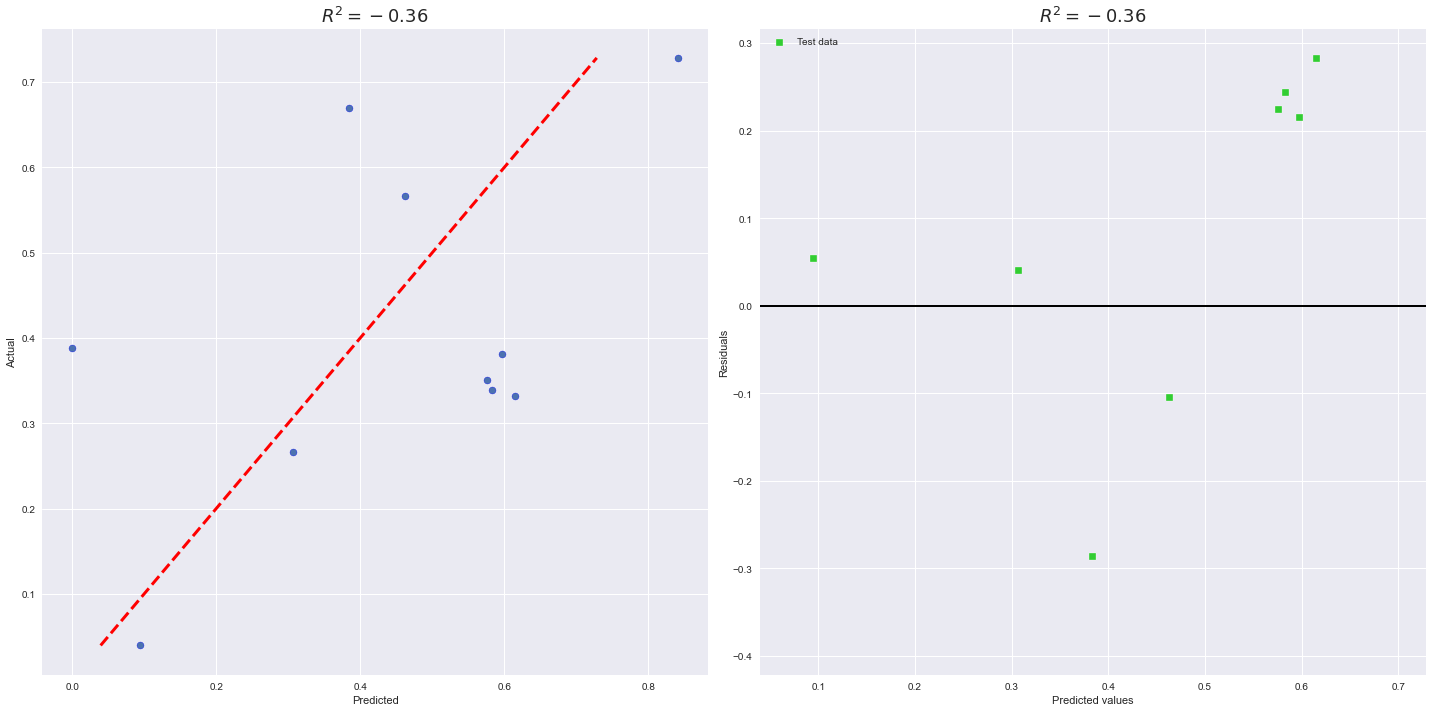

In [74]:
plot_regression_results(poly_pred, poly_r2)

## Random Forest
We can use grid search to tune the hyperparameter n_estimators of the random forest for best performance

In [75]:
# Hyperparameter tuning with grid search

rf = RandomForestRegressor(random_state=42)

rf_params = {"n_estimators": [50, 100, 500]}
grid_search_rf = GridSearchCV(rf, param_grid=rf_params, scoring='r2')
grid_result_rf = grid_search_rf.fit(X_train,Y_train)
print(f'Best score: {grid_result_rf.best_score_} using parameters: {grid_result_rf.best_params_}')

Best score: 0.003950889485995179 using parameters: {'n_estimators': 500}


In [77]:
rf = RandomForestRegressor(random_state=42, n_estimators=500)

rf_model = rf.fit(X_train,Y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(Y_test, rf_pred)
print(f'MSE: {mean_squared_error(Y_test, rf_pred)}')
print(f'R2: {r2_score(Y_test, rf_pred)}')

MSE: 0.023614403869609994
R2: 0.35687522574037833


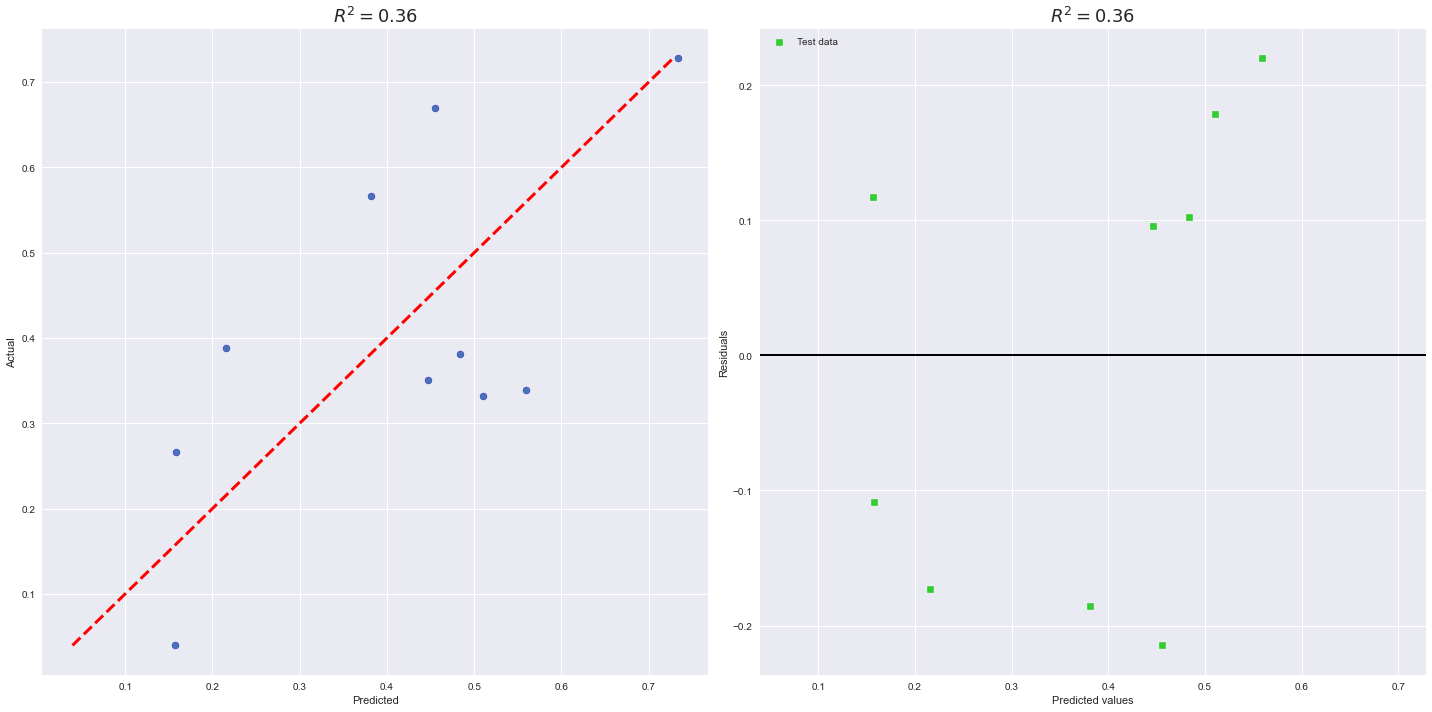

In [78]:
plot_regression_results(rf_pred, rf_r2 )

## AdaBoost

We can run a grid search for hyperparameters n_esimators and learning rate

In [79]:
ada = AdaBoostRegressor(random_state=42)

ada_params = {
    "n_estimators": [50, 100, 500],
    "learning_rate": [0.0001,0.001,0.01,0.1,1]
    }
grid_search_ada = GridSearchCV(ada, param_grid=ada_params, scoring='r2')
grid_result_ada = grid_search_ada.fit(X_train,Y_train)
print(f'Best score: {grid_result_ada.best_score_} using parameters: {grid_result_ada.best_params_}')

Best score: 0.013612775199571003 using parameters: {'learning_rate': 1, 'n_estimators': 50}


In [81]:
ada = AdaBoostRegressor(random_state=42, n_estimators=50, learning_rate=0.01)

ada_model = ada.fit(X_train,Y_train)
ada_pred = ada_model.predict(X_test)
ada_r2 = r2_score(Y_test, ada_pred)
print(f'MSE: {mean_squared_error(Y_test, ada_pred)}')
print(f'R2: {r2_score(Y_test, ada_pred)}')

MSE: 0.022012787815861863
R2: 0.40049432231824866


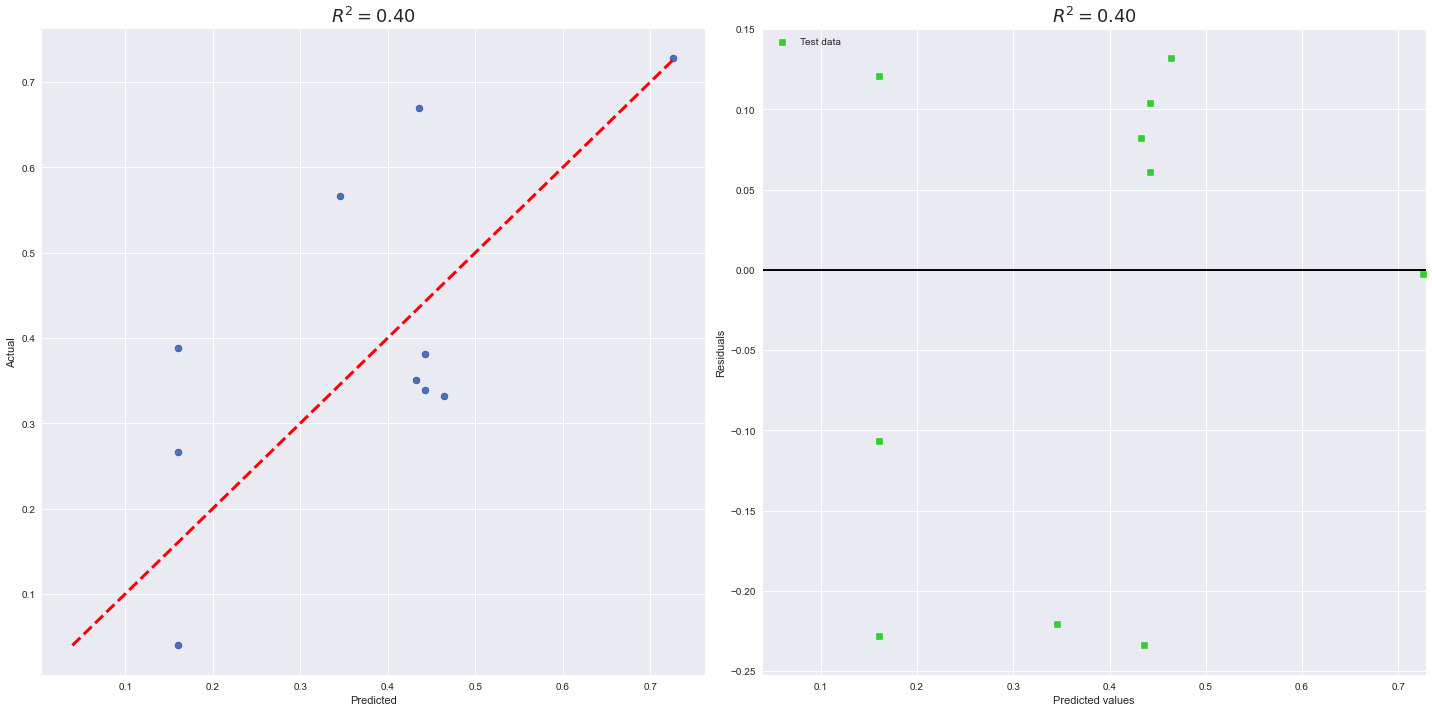

In [82]:
plot_regression_results(ada_pred, ada_r2)

## Bagging Regressor

In [83]:
bag = BaggingRegressor(random_state=42)

bag_params = {
    "n_estimators": [50, 100, 500],
    }
grid_search_bag = GridSearchCV(bag, param_grid=bag_params, scoring='r2')
grid_result_bag = grid_search_bag.fit(X_train,Y_train)
print(f'Best score: {grid_result_bag.best_score_} using parameters: {grid_result_bag.best_params_}')

Best score: 0.01420133241321444 using parameters: {'n_estimators': 500}


In [86]:
bag = BaggingRegressor(random_state=42, n_estimators=500)

bag_model = bag.fit(X_train,Y_train)
bag_pred = bag_model.predict(X_test)
bag_r2 = r2_score(Y_test, bag_pred)
print(f'MSE: {mean_squared_error(Y_test, bag_pred)}')
print(f'R2: {r2_score(Y_test, bag_pred)}')

MSE: 0.025048281256621657
R2: 0.31782439574993315


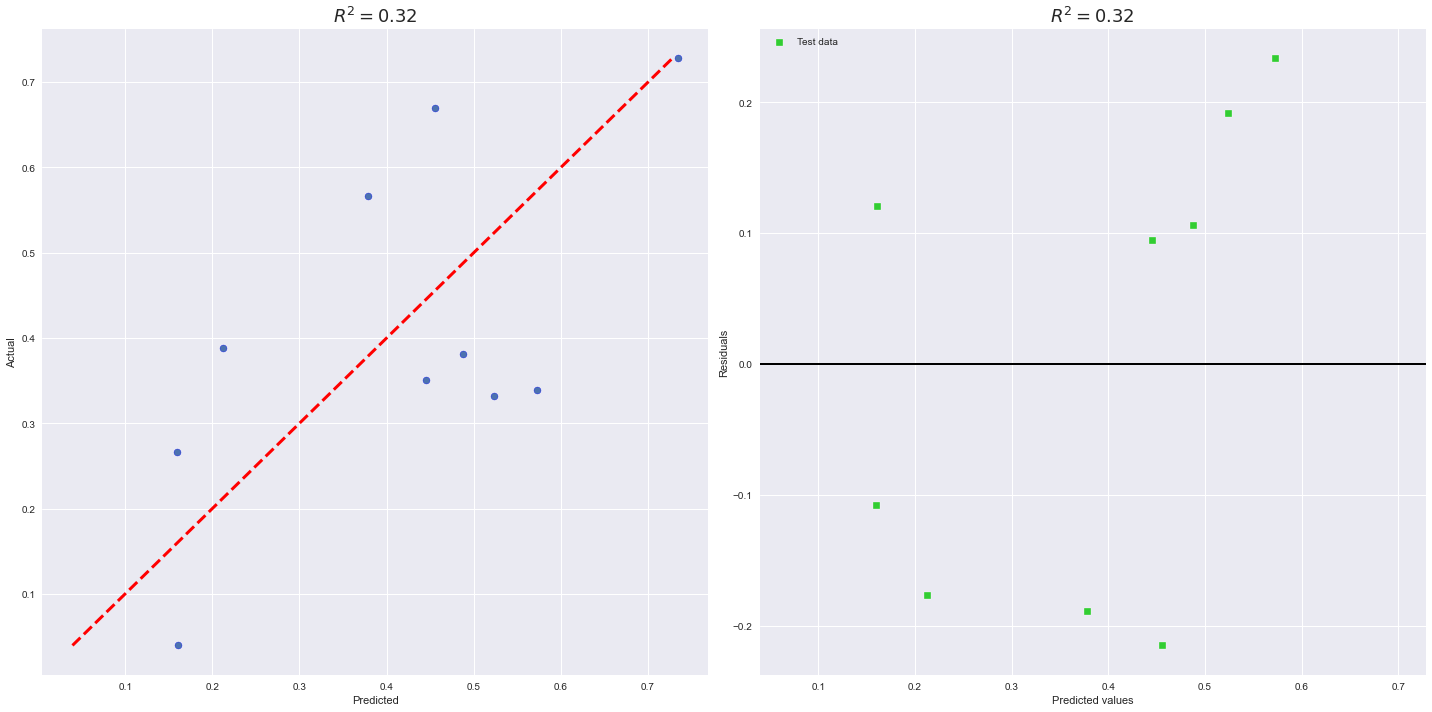

In [87]:
plot_regression_results(bag_pred, bag_r2)

## XGBoost

In [88]:
xgb = XGBRegressor(random_state=42)

xgb_params = {
    "n_estimators": [50, 100, 500],
    "learning_rate": [0.0001,0.001,0.01,0.1,1]
    }
grid_search_xgb = GridSearchCV(xgb, param_grid=xgb_params, scoring='r2')
grid_result_xgb = grid_search_xgb.fit(X_train,Y_train)
print(f'Best score: {grid_result_xgb.best_score_} using parameters: {grid_result_xgb.best_params_}')

Best score: -0.03828221799524871 using parameters: {'learning_rate': 0.01, 'n_estimators': 100}


In [93]:
xgb = XGBRegressor(random_state=42, n_estimators=100, learning_rate = 0.01)

xgb_model = xgb.fit(X_train,Y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(Y_test, xgb_pred)
print(f'MSE: {mean_squared_error(Y_test, xgb_pred)}')
print(f'R2: {r2_score(Y_test, xgb_pred)}')

MSE: 0.02136150678021804
R2: 0.41823158857916176


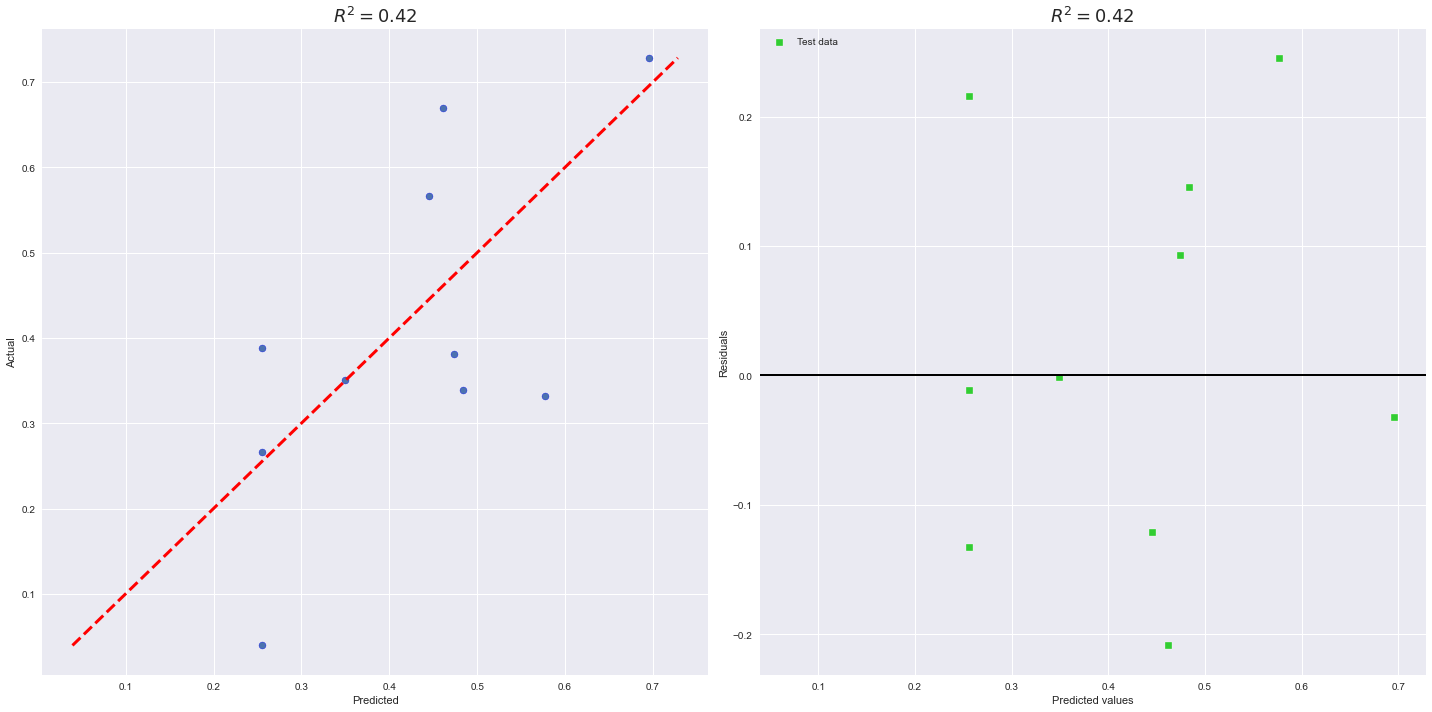

In [94]:
plot_regression_results(xgb_pred, xgb_r2)

## SVR

In [96]:
svr = SVR()

svr_model = svr.fit(X_train,Y_train)
svr_pred = svr_model.predict(X_test)
svr_r2 = r2_score(Y_test, svr_pred)
print(f'MSE: {mean_squared_error(Y_test, svr_pred)}')
print(f'R2: {r2_score(Y_test, svr_pred)}')

MSE: 0.033148692496628454
R2: 0.09721433170153193


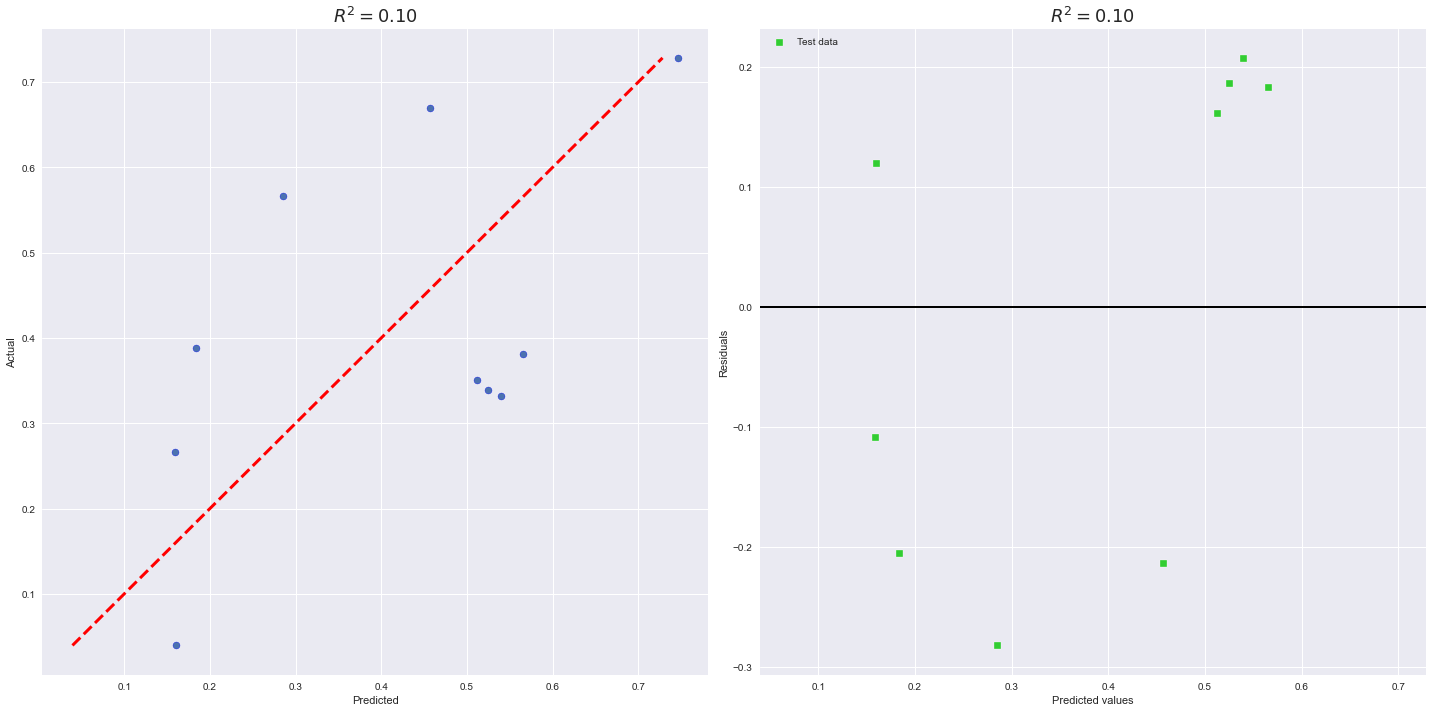

In [97]:
plot_regression_results(svr_pred, svr_r2)

## Summary of Test Results

In [105]:
# results by r2 values
results = np.array([lin_r2, ridge_r2, lasso_r2, poly_r2, rf_r2, ada_r2, bag_r2, xgb_r2, svr_r2])
sorted_list = -np.sort(-results)
regressors = {"Rank": range(1,10), "Regressors": ["XGBoost", "AdaBoost","BaggingRegressor", "RandomForest", "LinearRegression", "Ridge", "SVR", "Lasso", "PolynomialRegression"], "R2 Value": sorted_list, }
results_final = pd.DataFrame(regressors )
print(results_final)

   Rank            Regressors  R2 Value
0     1               XGBoost  0.418232
1     2              AdaBoost  0.400494
2     3      BaggingRegressor  0.356875
3     4          RandomForest  0.317824
4     5      LinearRegression  0.269345
5     6                 Ridge  0.148547
6     7                   SVR  0.097214
7     8                 Lasso -0.006232
8     9  PolynomialRegression -0.355932


# Feature Importance Ranking

It may be of value to researchers if for each model they can extract those features that are ranked as most important so they can further investigate as to why that chemical property is strongly associated with increased or decreased drug effectiveness for COVID-19. We have implemented permutation feature importance ranking and created a function get_kmost_important_features to return any number k features in descending order of importance for a given regression model.  An example is below for the best performing model of XGBoost:

In [107]:
# Extract k most import features
def get_kmost_important_features(k, model):
    r = permutation_importance(model, X_train, Y_train, n_repeats=10, random_state=42, scoring="r2")
    sorted = -np.sort(-r.importances_mean)
    importances = r.importances_mean
    indexes = []
    for i in range(k):
        index = np.where(importances == sorted[i])[0]
        indexes.append(index[0])
    return indexes




In [108]:
# Get 10 most important features 
indexes = get_kmost_important_features(10, xgb_model)
X_train.columns[indexes]

Index(['YStericQuadrupole3D', 'EffectiveRotorCount3D', 'MolecularWeight',
       'SMILES', 'FeatureDonorCount3D', 'XStericQuadrupole3D', 'XLogP',
       'FeatureRingCount3D', 'Complexity', 'ConformerModelRMSD3D'],
      dtype='object')